# Exercício 6

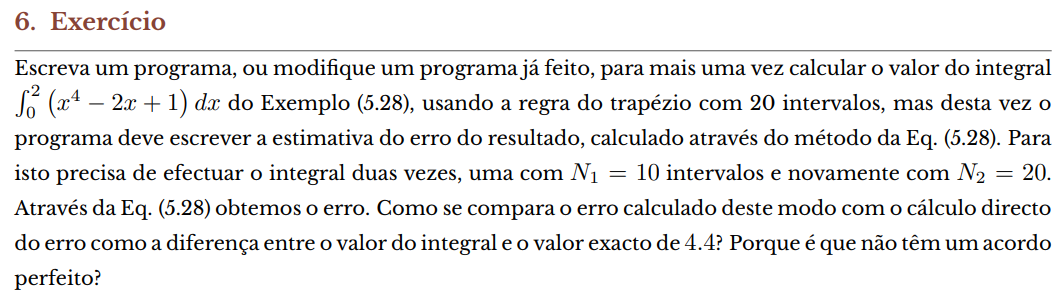

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from typing import Callable

In [3]:
# Regra do trapézio total para n passos
def trapezio_total(start: float, end: float, func: Callable, n: float) -> float:
    # Abcissas
    h = (end - start) / n
    tt = np.linspace(start, end, n + 1)
    vv = func(tt)

    # Pesos
    wn = np.ones(n + 1)
    wn[0] = 0.5
    wn[-1] = 0.5

    return h * (vv * wn).sum()


# Regra do trapézio com estimativa de erro para n passos
def trapezio_erro(start: float, end: float, func: Callable, n: float) -> tuple[float, float]:
    I1 = trapezio_total(start, end, func, n//2)
    I2 = trapezio_total(start, end, func, n)
    eps2 = (I2 - I1) / 3

    return (I2, eps2)


def f(x: float) -> float:
    return x**4 - 2*x + 1


I, eps = trapezio_erro(0, 2, f, 20)
I_real = 4.4

print(f"O valor real do integral é {I_real}, mas nós obtivemos {I}.")
print(f"O erro real é {I_real-I:.5f}, mas nós estimamos {eps:.5f}.")

O valor real do integral é 4.4, mas nós obtivemos 4.426660000000001.
O erro real é -0.02666, mas nós estimamos -0.02663.


A nossa estimativa do erro discorda do valor real porque a expressão que usamos para estimar o erro foi obtida considerando apenas o termo que mais contribui para o erro, descartando-se termos de ordens superiores.